In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import pickle
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pylab as plt

In [64]:
import pandas as pd
customer_df=pd.read_csv('customers.csv')

In [65]:
customer_df.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [5]:
customer_df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [6]:
customer_df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [7]:
customer_df.shape

(10695, 11)

In [8]:
customer_df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [9]:
customer_df_cleaned=customer_df.dropna(axis=0)

In [10]:
customer_df_cleaned.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [11]:
customer_df_cleaned.shape

(8819, 11)

In [12]:
customer_df_cleaned['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
customer_df_cleaned['Ever_Married'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
customer_df_cleaned['Graduated'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
customer_df_cleaned['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
      dtype=object)

In [16]:
customer_df_cleaned['Spending_Score'].unique()

array(['Low', 'High', 'Average'], dtype=object)

In [17]:
customer_df_cleaned['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
      dtype=object)

In [18]:
customer_df_cleaned['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [19]:
categories_list=[['Male', 'Female'],
                 ['No', 'Yes'],
                 ['No', 'Yes'],
                 ['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
       ['Low', 'High', 'Average'],
       ]
enc=OrdinalEncoder(categories=categories_list)






In [20]:
customers_1 = customer_df_cleaned.copy()

In [21]:
customers_1[['Gender',
             'Ever_Married',
              'Graduated','Profession',
              'Spending_Score']] = enc.fit_transform(customers_1[['Gender',
                                                                 'Ever_Married',
                                                                 'Graduated','Profession',
                                                                 'Spending_Score']])

In [22]:
customers_1.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [23]:
le=LabelEncoder()

In [24]:
customers_1['Segmentation'] = le.fit_transform(customers_1['Segmentation'])

In [25]:
customers_1.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation         int64
dtype: object

In [26]:
customers_1 = customers_1.drop('ID',axis=1)
customers_1 = customers_1.drop('Var_1',axis=1)

In [27]:
customers_1.dtypes

Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation         int64
dtype: object

In [28]:

corr = customers_1.corr()

In [29]:
corr = customers_1.corr()

<ipython-input-30-44f5f814d73c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customers_1['Age'])


<Axes: ylabel='count'>

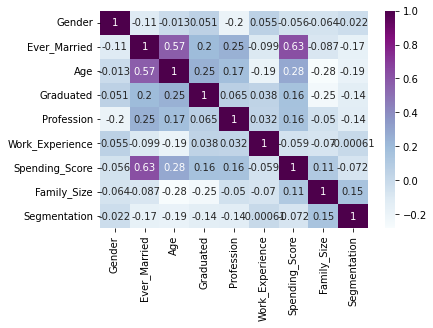

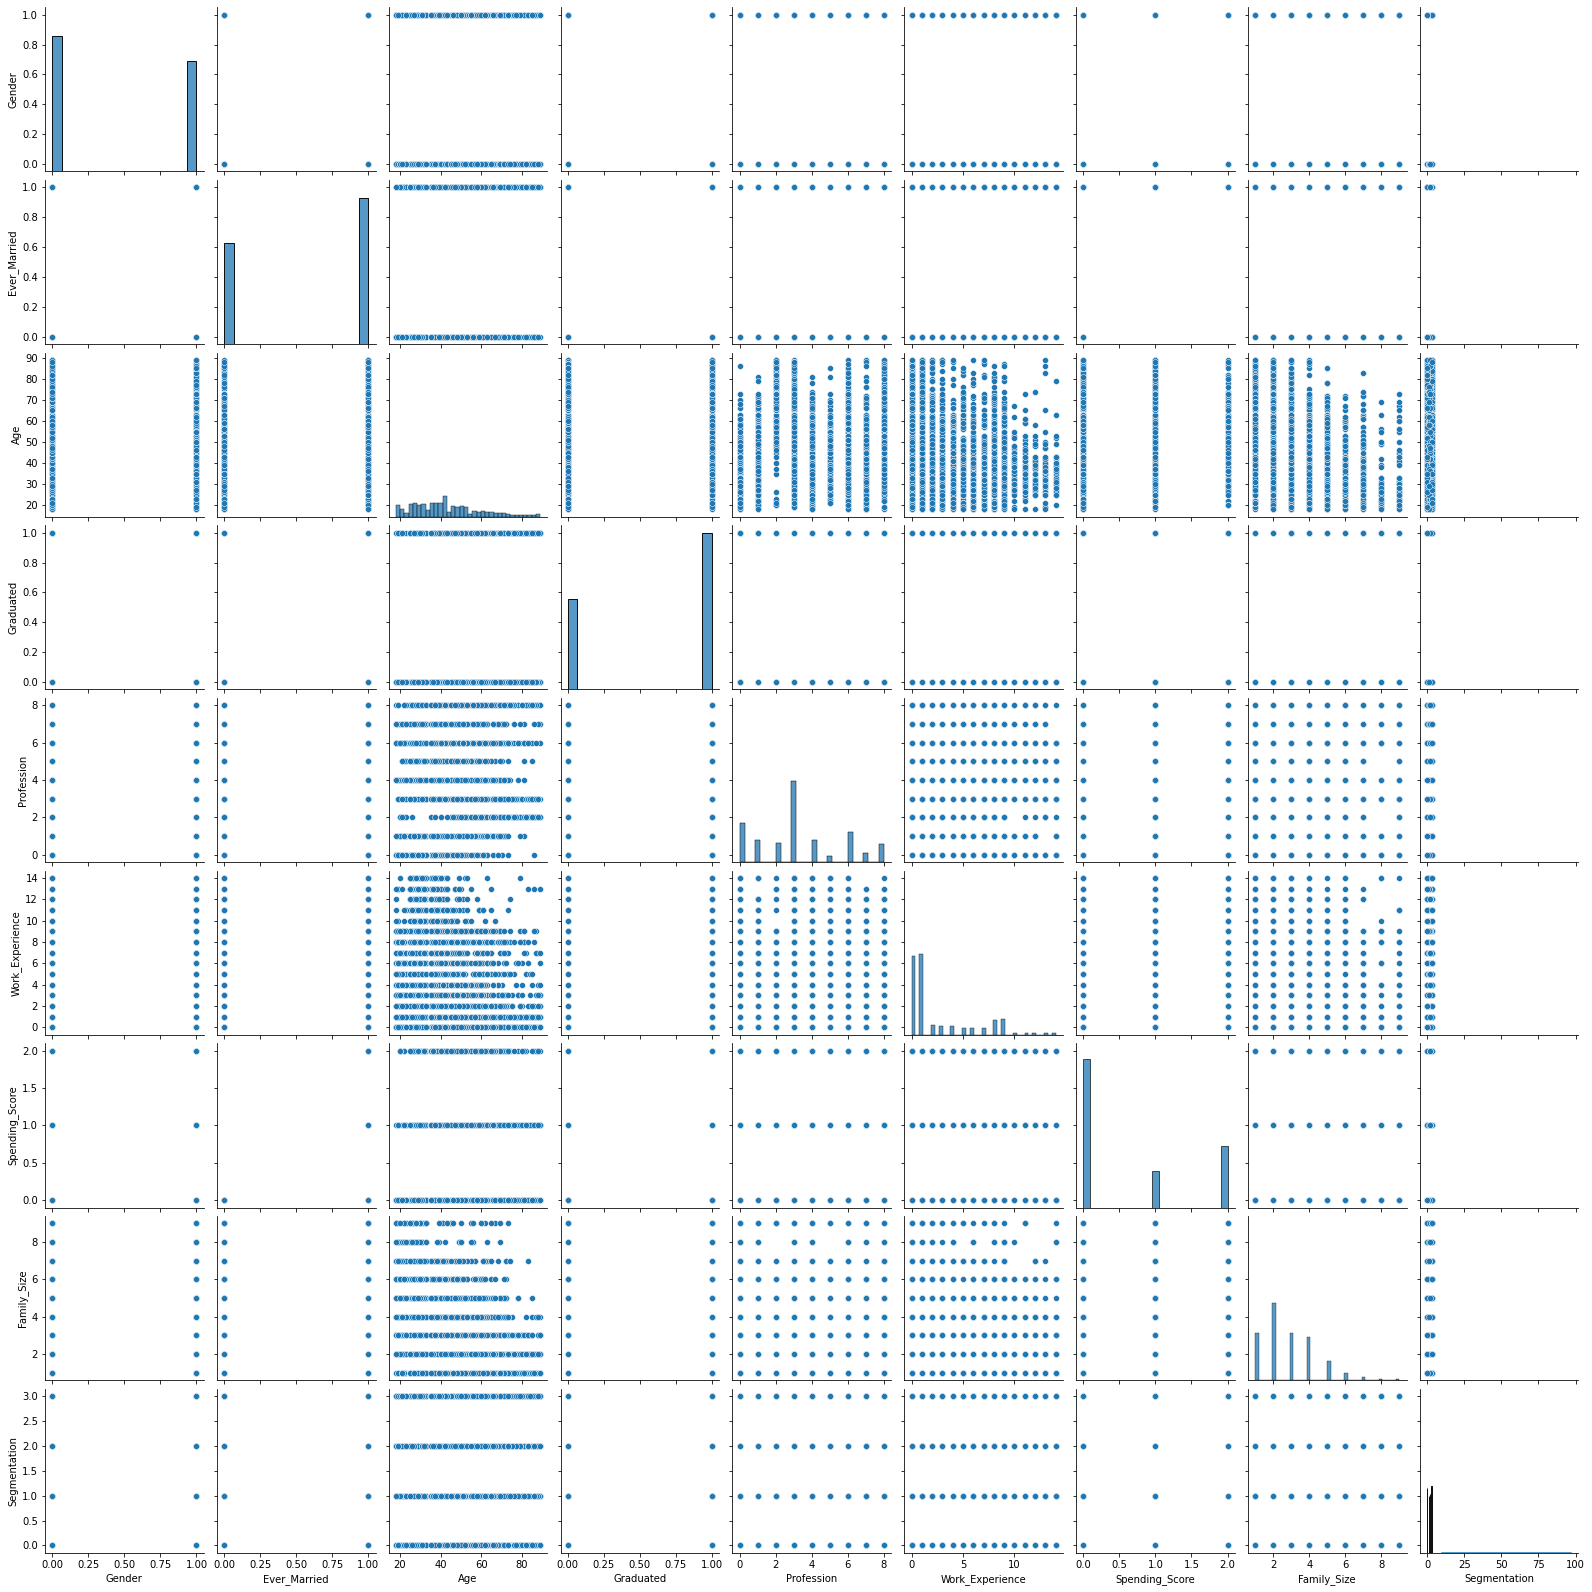

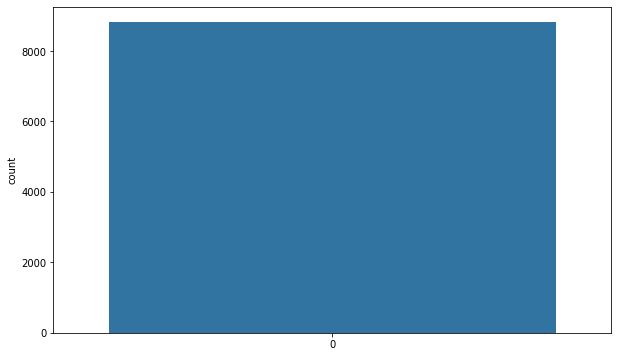

In [30]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="BuPu",
        annot= True)
sns.pairplot(customers_1)
sns.distplot(customers_1['Age'])     
plt.figure(figsize=(10,6))
sns.countplot(customers_1['Family_Size'])

In [31]:
X=customers_1[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size']].values

In [32]:
y1 = customers_1[['Segmentation']].values

In [33]:
y1[10]

array([1])

In [34]:
one_hot_enc = OneHotEncoder()

In [35]:
one_hot_enc.fit(y1)

OneHotEncoder()

In [36]:
y1.shape

(8819, 1)

In [37]:
y = one_hot_enc.transform(y1).toarray()

In [38]:
y.shape

(8819, 4)

In [39]:
y1[0]

array([3])

In [40]:
y[0]

array([0., 0., 0., 1.])

In [41]:
X.shape

(8819, 8)

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=50)
     

In [43]:
X_train[0]

array([ 1.,  1., 85.,  0.,  2.,  0.,  0.,  1.])

In [44]:
X_train.shape

(5908, 8)

In [45]:
scaler_age = MinMaxScaler()

In [46]:
scaler_age.fit(X_train[:,2].reshape(-1,1))

MinMaxScaler()

In [47]:
X_train_scaled = np.copy(X_train)
X_test_scaled = np.copy(X_test)

In [48]:
ai_brain =Sequential([Dense(8,input_shape = (8,) ),
    Dense(32,activation="relu"),
    Dense(4,activation='softmax')
])

In [49]:
ai_brain.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [50]:
ai_brain.fit(x=X_train_scaled,y=y_train,
             epochs=2000,batch_size=256,
             validation_data=(X_test_scaled,y_test),
             )

Epoch 1/2000
24/24 [==============================] - 1s 16ms/step - loss: 4.1444 - accuracy: 0.2277 - val_loss: 1.7457 - val_accuracy: 0.2209
Epoch 2/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.6891 - accuracy: 0.2194 - val_loss: 1.5086 - val_accuracy: 0.2226
Epoch 3/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.4676 - accuracy: 0.2292 - val_loss: 1.4168 - val_accuracy: 0.2518
Epoch 4/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.3917 - accuracy: 0.2754 - val_loss: 1.3783 - val_accuracy: 0.2879
Epoch 5/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.3656 - accuracy: 0.3243 - val_loss: 1.3588 - val_accuracy: 0.3195
Epoch 6/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.3463 - accuracy: 0.3485 - val_loss: 1.3432 - val_accuracy: 0.3634
Epoch 7/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.3287 - accuracy: 0.3776 - val_loss: 1.3306 - val_accuracy: 0.3751
Epoch

In [51]:
metrics = pd.DataFrame(ai_brain.history.history)

In [52]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,4.144449,0.227657,1.745674,0.220886
1,1.689116,0.219364,1.508626,0.222604
2,1.467586,0.229181,1.416776,0.251804
3,1.391706,0.275389,1.378277,0.287874
4,1.365570,0.324306,1.358841,0.319478


<Axes: >

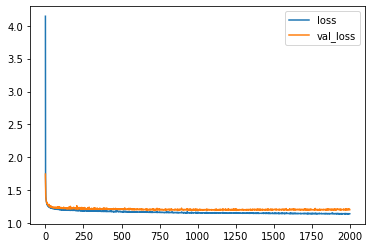

In [53]:
metrics[['loss','val_loss']].plot()

<Axes: >

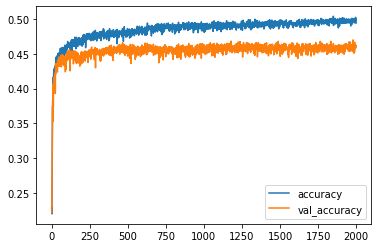

In [54]:
metrics[['accuracy','val_accuracy']].plot()

In [55]:
x_test_predictions = np.argmax(ai_brain.predict(X_test_scaled), axis=1)

91/91 [==============================] - 0s 1ms/step


In [56]:
x_test_predictions.shape

(2911,)

In [57]:
y_test_truevalue = np.argmax(y_test,axis=1)

In [58]:
y_test_truevalue.shape

(2911,)

In [59]:
print(confusion_matrix(y_test_truevalue,x_test_predictions))

[[333 152 109 163]
 [205 187 196  98]
 [108 141 351  86]
 [199  62  47 474]]


In [60]:
print(classification_report(y_test_truevalue,x_test_predictions))

              precision    recall  f1-score   support

           0       0.39      0.44      0.42       757
           1       0.35      0.27      0.30       686
           2       0.50      0.51      0.51       686
           3       0.58      0.61      0.59       782

    accuracy                           0.46      2911
   macro avg       0.45      0.46      0.45      2911
weighted avg       0.46      0.46      0.46      2911



In [61]:
x_single_prediction = np.argmax(ai_brain.predict(X_test_scaled[1:2,:]), axis=1) 

1/1 [==============================] - 0s 41ms/step


In [62]:
print(x_single_prediction)

[2]


In [63]:
print(le.inverse_transform(x_single_prediction))

['C']
